In [1]:
import numpy as np                                   
import pandas as pd                                   
from sklearn.model_selection import train_test_split  
import pycaret                                        
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('PainelPassageiro.csv', delimiter=',')
df['DATA'] = pd.to_datetime(df['DATA'])
df.head()

,DATA,PassageirosPagantes,PassageirosIsentos,Total,n_qtd
0,2020-01-03,117109,27918,145027,1
1,2020-02-03,615010,100508,715518,2
2,2020-03-03,630057,102958,733015,3
3,2020-04-03,639283,109205,748488,4
4,2020-05-03,640561,106268,746829,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATA                 610 non-null    datetime64[ns]
 1   PassageirosPagantes  610 non-null    int64         
 2   PassageirosIsentos   610 non-null    int64         
 3   Total                610 non-null    int64         
 4   n_qtd                610 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 24.0 KB


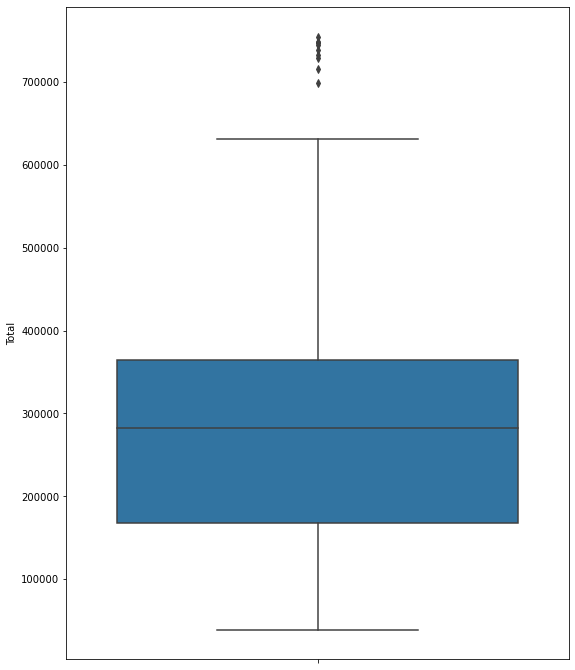

In [4]:
fig, ax = plt.subplots(figsize=(9,12))
sns.boxplot( y=df["Total"], ax=ax );
plt.show()

In [5]:
df['mes'] = df['DATA'].dt.month
df['ano'] = df['DATA'].dt.year
df['dia'] = df['DATA'].dt.day
df['diadasemana'] = df['DATA'].dt.dayofweek 
df['diadoano'] = df['DATA'].dt.dayofyear

In [6]:
df = df.rename(columns={'n_qtd':'Series'}) 

In [7]:
df.head()

,DATA,PassageirosPagantes,PassageirosIsentos,Total,Series,mes,ano,dia,diadasemana,diadoano
0,2020-01-03,117109,27918,145027,1,1,2020,3,4,3
1,2020-02-03,615010,100508,715518,2,2,2020,3,0,34
2,2020-03-03,630057,102958,733015,3,3,2020,3,1,63
3,2020-04-03,639283,109205,748488,4,4,2020,3,4,94
4,2020-05-03,640561,106268,746829,5,5,2020,3,6,124


Text(0.5, 1.0, 'Passageiros ao longo do tempo')

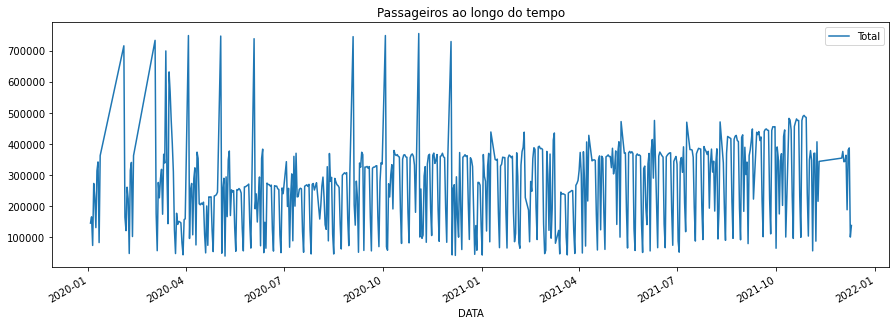

In [8]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
df.groupby('DATA').agg({'Total':'sum'}).plot(ax=ax)
ax.set_title('Passageiros ao longo do tempo')

In [9]:
df2 = df[df['Series'] >= 307]

In [10]:
df2.shape

(304, 10)

In [11]:
df2.head()

,DATA,PassageirosPagantes,PassageirosIsentos,Total,Series,mes,ano,dia,diadasemana,diadoano
306,2021-01-01,33575,8703,42278,307,1,2021,1,4,1
307,2021-02-01,95419,16489,111908,308,2,2021,1,0,32
308,2021-03-01,46325,11299,57624,309,3,2021,1,0,60
309,2021-04-01,271733,42414,314147,310,4,2021,1,3,91
310,2021-05-01,280883,42546,323429,311,5,2021,1,5,121


In [12]:
df = df[['Series', 'ano', 'mes', 'dia','DATA','Total','diadoano','diadasemana']]  
df2 = df2[['Series', 'ano', 'mes', 'dia','DATA','Total','diadoano','diadasemana']]  

# todo período

In [15]:
train2 = df[df['DATA'] < '2021-10-01']
test2 = df[df['DATA'] >= '2021-10-10']
train2.shape, test2.shape

((561, 8), (40, 8))

In [16]:
from pycaret.regression import *

s = setup(data = train2, test_data = test2, target = 'Total', data_split_shuffle = False, fold_strategy = 'timeseries', 
          fold = 3, ignore_features = ['DATA'],
              numeric_features = ['Series','dia','diadoano', 'ano'],
              categorical_features = ['mes', 'diadasemana',],
              silent = True,verbose = False, session_id = 123)

In [17]:
best = compare_models(sort = 'R2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,81989.4105,10187734909.9379,100880.7723,0.2266,0.5124,0.4981,0.3533
et,Extra Trees Regressor,89343.2745,11926714259.4141,108902.7808,0.0828,0.5282,0.4752,0.0933
rf,Random Forest Regressor,96514.5619,13360094988.2794,115048.0386,-0.0410,0.5255,0.4525,0.1033
huber,Huber Regressor,91281.0110,13813433769.8032,116761.7054,-0.0810,0.6136,0.6204,0.0300
catboost,CatBoost Regressor,98582.4231,15184328798.9958,121807.0372,-0.1706,0.5937,0.4907,0.6400
ada,AdaBoost Regressor,120867.8644,17723022982.7354,132894.8507,-0.3405,0.6121,0.5814,0.0467
knn,K Neighbors Regressor,112336.1714,18073269751.8084,134311.6611,-0.3710,0.6808,0.7500,0.0167
dt,Decision Tree Regressor,96894.4381,18870948842.9095,137336.0862,-0.4298,0.8060,0.4687,0.0133
gbr,Gradient Boosting Regressor,130063.5786,26606025643.8095,153506.5672,-1.0644,1.0244,0.6292,0.0367
xgboost,Extreme Gradient Boosting,128491.5143,27182464692.6171,156702.0485,-1.1138,1.0334,0.5730,0.0933


In [ ]:
predictions = predict_model(best, data=df)
predictions['DATA'] = pd.date_range(start='2020-03-01', end = '2021-10-31', freq = 'D')
fig = px.line(predictions, x='DATA', y=["Total", "Label"], template = 'gridon')
fig.add_vrect(x0="2020-03-01", x1="2021-10-31", fillcolor="grey", opacity=0.25, line_width=0)
fig.show()

# 2021

In [18]:
train = df2[df2['DATA'] < '2021-10-01']
test = df2[df2['DATA'] >= '2021-10-10']
train.shape, test.shape

((255, 8), (40, 8))

In [19]:
from pycaret.regression import *

s = setup(data = train, test_data = test, target = 'Total', data_split_shuffle = False, fold_strategy = 'timeseries', 
          fold = 3, ignore_features = ['DATA'],
              numeric_features = ['Series','dia','diadoano', 'ano'],
              categorical_features = ['mes', 'diadasemana',],
              silent = True,verbose = False, session_id = 123)

In [38]:
best = compare_models(sort = 'R2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,73087.3352,9930298491.6062,98318.4324,0.3359,0.4845,0.4211,0.1000
omp,Orthogonal Matching Pursuit,83981.8505,10233164111.3719,99807.6662,0.3167,0.4643,0.4312,0.0100
rf,Random Forest Regressor,82103.5022,10391520844.1949,99889.6338,0.3095,0.4387,0.3820,0.1067
huber,Huber Regressor,84266.7235,10276434409.1779,101118.6449,0.2975,0.5109,0.4881,0.0233
catboost,CatBoost Regressor,82502.2086,11621631323.8739,106184.5553,0.2240,0.4866,0.3842,0.5667
ada,AdaBoost Regressor,99515.4749,12947527798.9916,112763.0212,0.1297,0.4907,0.4533,0.0367
en,Elastic Net,105988.0806,13371583932.4975,115170.0218,0.0928,0.5727,0.6245,0.0133
ridge,Ridge Regression,92106.2864,13187457821.1839,114234.4522,0.0843,0.5947,0.5117,1.2233
dt,Decision Tree Regressor,81622.0476,14497744391.4550,120089.8821,0.0112,0.6154,0.3937,0.0133
lightgbm,Light Gradient Boosting Machine,104245.3686,14885027249.8599,121901.7636,-0.0336,0.5818,0.5932,0.4233


#  et - extra trees regressor

In [21]:
prediction_holdout = predict_model(best);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,82400.1902,10207487384.9331,101032.1107,0.4886,0.4597,0.4325


In [34]:
predictions_final = predict_model(best, data=df2)
predictions_final['DATA'] = pd.date_range(start='2021-01-01', end = '2021-10-31', freq = 'D')
fig_final = px.line(predictions_final, x='DATA', y=["Total", "Label"], template = 'gridon')
fig_final.add_vrect(x0="2021-01-01", x1="2021-10-31", fillcolor="grey", opacity=0.25, line_width=0)
fig_final.update_layout(title='Extra Trees Regressor',
                   xaxis_title='Data',
                   yaxis_title='Passageiros')
fig_final.show()

In [27]:
final_best = finalize_model(best)

In [22]:
df.head()

,Series,ano,mes,dia,DATA,Total,diadoano,diadasemana
0,1,2020,1,3,2020-01-03,145027,3,4
1,2,2020,2,3,2020-02-03,715518,34,0
2,3,2020,3,3,2020-03-03,733015,63,1
3,4,2020,4,3,2020-04-03,748488,94,4
4,5,2020,5,3,2020-05-03,746829,124,6


In [23]:
all_dates = pd.date_range(start = '2021-11-01', end = '2022-02-28', freq = 'D')

score_df = pd.DataFrame()

score_df['DATA'] = all_dates
score_df['dia'] = [i.day for i in score_df['DATA']]
score_df['mes'] = [i.month for i in score_df['DATA']]
score_df['ano'] = [i.year for i in score_df['DATA']]
score_df['diadasemana'] = [i.dayofweek for i in score_df['DATA']]
score_df['diadoano'] = [i.dayofyear for i in score_df['DATA']]

score_df['Series'] = np.arange(611,(611+len(score_df)))
score_df.head()

,DATA,dia,mes,ano,diadasemana,diadoano,Series
0,2021-11-01,1,11,2021,0,305,611
1,2021-11-02,2,11,2021,1,306,612
2,2021-11-03,3,11,2021,2,307,613
3,2021-11-04,4,11,2021,3,308,614
4,2021-11-05,5,11,2021,4,309,615


In [28]:
predictions_future = predict_model(final_best, data=score_df)
predictions_future.head()

,DATA,dia,mes,ano,diadasemana,diadoano,Series,Label
0,2021-11-01,1,11,2021,0,305,611,312755.56
1,2021-11-02,2,11,2021,1,306,612,372384.00
2,2021-11-03,3,11,2021,2,307,613,326990.19
3,2021-11-04,4,11,2021,3,308,614,288099.37
4,2021-11-05,5,11,2021,4,309,615,227720.94


In [29]:
df2.tail()

,Series,ano,mes,dia,DATA,Total,diadoano,diadasemana
605,606,2021,10,27,2021-10-27,491648,300,2
606,607,2021,10,28,2021-10-28,487126,301,3
607,608,2021,10,29,2021-10-29,484995,302,4
608,609,2021,10,30,2021-10-30,239003,303,5
609,610,2021,10,31,2021-10-31,103260,304,6


In [30]:
predictions_future = predictions_future.rename(columns={'Label':'Total'}) 

In [31]:
concat_df = pd.concat([df2,predictions_future], axis=0)

In [32]:
concat_df.tail()

,Series,ano,mes,dia,DATA,Total,diadoano,diadasemana
115,726,2022,2,24,2022-02-24,383315.95,55,3
116,727,2022,2,25,2022-02-25,342775.46,56,4
117,728,2022,2,26,2022-02-26,222837.25,57,5
118,729,2022,2,27,2022-02-27,119642.03,58,6
119,730,2022,2,28,2022-02-28,376094.07,59,0


In [37]:
concat_df_i = pd.date_range(start='2021-01-01', end = '2022-02-28', freq = 'D')
concat_df.set_index(concat_df_i, inplace=True)
fig = px.line(concat_df, x=concat_df.index, y="Total", template = 'gridon')
# add a vertical rectange for test-set separation
fig.add_vrect(x0="2021-11-01", x1="2022-02-28", fillcolor="grey", opacity=0.25, line_width=0)
fig.update_layout(title='Extra Trees Regressor - Previsão de Passageiros',
                   xaxis_title='Data',
                   yaxis_title='Passageiros')
fig.show()

# rf

In [39]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,80989.9041,9310883229.7801,96492.9180,0.3128,0.4996,0.4994
1,56035.7457,5906695033.5217,76855.0261,0.5605,0.3877,0.3004
2,109284.8567,15956984269.2827,126320.9574,0.0552,0.4288,0.3462
Mean,82103.5022,10391520844.1949,99889.6338,0.3095,0.4387,0.3820
SD,21753.1152,4173560563.9054,20336.7131,0.2063,0.0462,0.0851


In [40]:
prediction_holdout = predict_model(rf);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,92149.9727,12732292040.4704,112837.4585,0.3621,0.4718,0.4547


In [41]:
predictions_final_rf = predict_model(rf, data=df2)

In [53]:
predictions_final_rf['DATA'] = pd.date_range(start='2021-01-01', end = '2021-10-31', freq = 'D')
fig_final_rf = px.line(predictions_final_rf, x='DATA', y=["Total", "Label"], template = 'gridon')
fig_final_rf.add_vrect(x0="2021-01-01", x1="2021-10-31", fillcolor="grey", opacity=0.25, line_width=0)
fig_final_rf.update_layout(title=' Random Forest Regressor',
                   xaxis_title='Data',
                   yaxis_title='Passageiros')
fig_final_rf.show()

In [43]:
final_best_rf = finalize_model(rf)

In [44]:
predictions_future_rf = predict_model(final_best_rf, data=score_df)
predictions_future_rf.head()

,DATA,dia,mes,ano,diadasemana,diadoano,Series,Label
0,2021-11-01,1,11,2021,0,305,611,318807.15
1,2021-11-02,2,11,2021,1,306,612,324423.68
2,2021-11-03,3,11,2021,2,307,613,316114.44
3,2021-11-04,4,11,2021,3,308,614,311102.89
4,2021-11-05,5,11,2021,4,309,615,298718.95


In [45]:
predictions_future_rf = predictions_future_rf.rename(columns={'Label':'Total'}) 

In [60]:
concat_df_rf = pd.concat([df2,predictions_future_rf], axis=0)

In [61]:
concat_df_rf.tail()

,Series,ano,mes,dia,DATA,Total,diadoano,diadasemana
115,726,2022,2,24,2022-02-24,359790.27,55,3
116,727,2022,2,25,2022-02-25,335800.03,56,4
117,728,2022,2,26,2022-02-26,261050.72,57,5
118,729,2022,2,27,2022-02-27,134103.89,58,6
119,730,2022,2,28,2022-02-28,348086.56,59,0


In [62]:
concat_df_i_rf = pd.date_range(start='2021-01-01', end = '2022-02-28', freq = 'D')
concat_df_rf.set_index(concat_df_i_rf, inplace=True)
fig = px.line(concat_df_rf, x=concat_df_rf.index, y="Total", template = 'gridon')

fig.add_vrect(x0="2021-11-01", x1="2022-02-28", fillcolor="grey", opacity=0.25, line_width=0)
fig.update_layout(title=' Random Forest Regressor - Previsão de Passageiros',
                   xaxis_title='Data',
                   yaxis_title='Passageiros')
fig.show()

In [73]:
concat_df_rf=concat_df_rf.reset_index()

In [74]:
concat_df = concat_df.reset_index()

In [76]:
concat_df_rf['dt_my'] = concat_df_rf['index'].dt.strftime('%Y-%m')
concat_df['dt_my'] = concat_df['index'].dt.strftime('%Y-%m')

In [80]:
concat_df_rf = concat_df_rf.groupby('dt_my').agg({'Total':'sum'}).sort_values('dt_my',ascending=True)
concat_df = concat_df.groupby('dt_my').agg({'Total':'sum'}).sort_values('dt_my',ascending=True)


In [81]:
concat_df

,Total
dt_my,
2021-01,8127863.00
2021-02,8401441.00
2021-03,7073826.00
2021-04,8004042.00
2021-05,8734730.00
2021-06,8412814.00
2021-07,9639522.00
2021-08,10248047.00
2021-09,10254264.00


In [82]:
concat_df.to_csv('resultado_et_my.csv')
concat_df_rf.to_csv('resultado_rf_my.csv')